In [1]:
import dask.dataframe as dd
import dask.bag as db
from dask.diagnostics import ProgressBar
import pandas as pd
import ndjson
import json
import cloudpickle

In [ ]:
client.close()

In [2]:
from dask.distributed import Client, progress

# Setup a local cluster.
# By default this sets up 1 worker per core
client = Client()
client.cluster

In [3]:
retweeters_bag = db.read_text(r"D:\Research\causal_inference_data2\retweeters\*.ndjson").map(json.loads)
retweeters = retweeters_bag.to_dataframe(meta={
    "id": "int64", 
    "user": "object", 
    "created_at": "datetime64[ns, UTC]"
})

In [4]:
df = retweeters.head()
df

,id,user,created_at
0,1220942880929304577,"{'id': 1000193665975779328, 'id_str': '1000193...",2020-01-25 05:34:01+00:00
1,1220941647527104512,"{'id': 1000193665975779328, 'id_str': '1000193...",2020-01-25 05:29:07+00:00
2,1220940970587344897,"{'id': 1000193665975779328, 'id_str': '1000193...",2020-01-25 05:26:26+00:00
3,1220940431715786752,"{'id': 1000193665975779328, 'id_str': '1000193...",2020-01-25 05:24:17+00:00
4,1220940365408038912,"{'id': 1000193665975779328, 'id_str': '1000193...",2020-01-25 05:24:01+00:00


In [5]:
retweeters["user_id"] = retweeters["user"].apply(lambda user: user["id"], meta="int64")

In [6]:
retweeters.dtypes

id                          int64
user                       object
created_at    datetime64[ns, UTC]
user_id                     int64
dtype: object

In [7]:
by_hour = retweeters.groupby([retweeters["user_id"], retweeters["created_at"].dt.round("H")])["id"].nunique()

In [ ]:
with ProgressBar():
    by_hour.reset_index().to_json(r"D:\Research\retweeters_activities4.ndjson")

In [76]:
client.close()

In [ ]:
by_hour_df = pd.read_json(r"D:\Research\retweeters_activities3.ndjson\0.part", lines=True)

In [ ]:
by_hour_df = pd.read_json(r"D:\Research\retweeters_activities4.ndjson\0.part", lines=True)

In [20]:
hours = by_hour_df.set_index(["user_id","created_at"])["id"].unstack().fillna(0)

In [22]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

In [42]:
only_latest = hours.loc[:, "2020-01-13":]

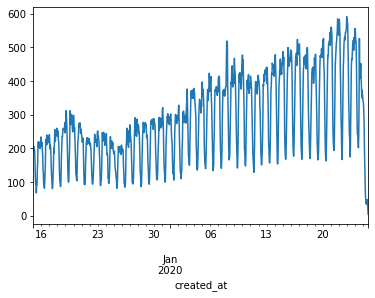

In [39]:
r = (only_latest > 0).astype("int").sum(axis=0)
r.plot()

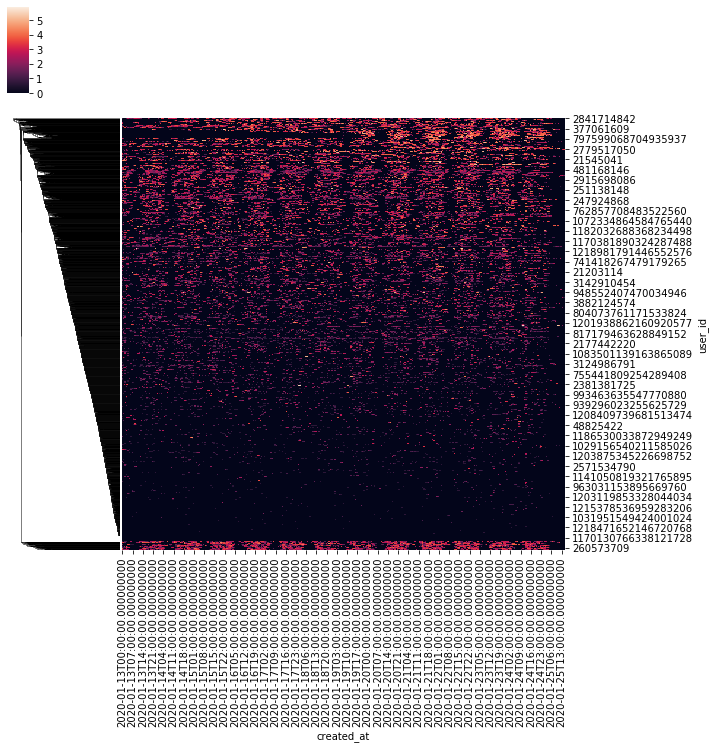

In [51]:
import numpy as np
sns.clustermap(np.log(only_latest+1), col_cluster=False)

In [48]:
help(sns.clustermap)

Help on function clustermap in module seaborn.matrix:

clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, **kwargs)
    Plot a matrix dataset as a hierarchically-clustered heatmap.
    
    Parameters
    ----------
    data: 2D array-like
        Rectangular data for clustering. Cannot contain NAs.
    pivot_kws : dict, optional
        If `data` is a tidy dataframe, can provide keyword arguments for
        pivot to create a rectangular dataframe.
    method : str, optional
        Linkage method to use for calculating clusters.
        See scipy.cluster.hierarchy.linkage documentation for more information:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
    metric : str, optional
        Distance metric to use for the data. See
        